In [51]:
path = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/'

In [52]:
import glob,re

In [53]:
date = '20180712_150834' #Reg 4 MX categories
#date = '20180601_165953'  #no Reg 4 MX categories
#date = '20180601_175956' #Reg 3 MX cats
#date = '20180601_180112' # no Reg 3 MX cat
files = glob.glob('%s/out_%s_node_*_transformed_MX/cat_opt.json'%(path,date))


In [54]:
files

['/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_10_transformed_MX/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_11_transformed_MX/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_12_transformed_MX/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_13_transformed_MX/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_14_transformed_MX/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_2_transformed_MX/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180712_150834_node_3_transformed_MX/cat_opt.json',
 '/afs/cern.ch/

In [55]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom','selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']  }


for fil in files:
    name = fil.split('/')[-2].split('node_')[-1]
    if name == 'SM_transformed_MX': name = '0'
    node = int(name.replace('_transformed_MX',''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['boundaries'] = np.array(val['boundaries'])
#        val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [56]:
import pandas as pd
df = pd.DataFrame(summary)

In [57]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [58]:
df.sort_index(inplace=True)
df

boundaries     fom  ncat  node
ncat node                                                        
3    0      [800.0, 516.133, 425.07, 250.049]  10.077     3     0
     2     [800.0, 564.906, 441.159, 250.001]  16.690     3     2
     3     [800.0, 559.229, 425.242, 250.001]  -3.922     3     3
     4     [800.0, 551.108, 399.641, 250.008]  -3.460     3     4
     5       [800.0, 511.35, 341.171, 308.69]   1.002     3     5
     6     [800.0, 558.336, 383.428, 294.177]  -3.908     3     6
     7     [800.0, 734.045, 431.988, 250.009]  -2.845     3     7
     8     [800.0, 484.363, 391.823, 306.644]   1.000     3     8
     9     [800.0, 522.327, 389.539, 274.962]  -2.747     3     9
     10    [800.0, 520.007, 381.291, 257.348]  -3.170     3    10
     11     [800.0, 523.721, 381.914, 258.11]  -3.319     3    11
     12    [800.0, 559.754, 433.073, 250.001]  -4.354     3    12
     13    [800.0, 506.358, 416.772, 250.394]  -4.864     3    13
     14    [800.0, 484.917, 396.854, 250.004]  12.927     3    14

In [59]:
df = df.query('fom<0')
df

boundaries    fom  ncat  node
ncat node                                                       
3    3     [800.0, 559.229, 425.242, 250.001] -3.922     3     3
     4     [800.0, 551.108, 399.641, 250.008] -3.460     3     4
     6     [800.0, 558.336, 383.428, 294.177] -3.908     3     6
     7     [800.0, 734.045, 431.988, 250.009] -2.845     3     7
     9     [800.0, 522.327, 389.539, 274.962] -2.747     3     9
     10    [800.0, 520.007, 381.291, 257.348] -3.170     3    10
     11     [800.0, 523.721, 381.914, 258.11] -3.319     3    11
     12    [800.0, 559.754, 433.073, 250.001] -4.354     3    12
     13    [800.0, 506.358, 416.772, 250.394] -4.864     3    13

In [61]:
from sklearn.cluster import KMeans

In [62]:
boundaries = []

#for ncats in [3]:
for ncats in [3]:    
    boundaries.append( np.vstack(df.loc[ncats,'boundaries'].values.tolist()).ravel() )
#for ncats in [4]:    
 #   boundaries.append( np.vstack(df.loc[ncats,'boundaries'].values.tolist()).ravel() )

In [63]:
boundaries = np.hstack(boundaries).ravel()

In [64]:
filtered=boundaries[(boundaries > 260)]
#filtered_2=boundaries[(boundaries > 260) & (boundaries < 800)]
#filtered = boundaries

In [65]:
import os
tag='newcodev2'
pathsave = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/plots/%s_%s_filtered260/'%(date,tag)
if not os.path.exists(pathsave):
    print pathsave, "doesn't exist, creating it..."
    os.makedirs(pathsave)

/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/plots/20180712_150834_newcodev2_filtered260/ doesn't exist, creating it...


[ 250.          284.5695      404.76533333  537.605       734.045     ]


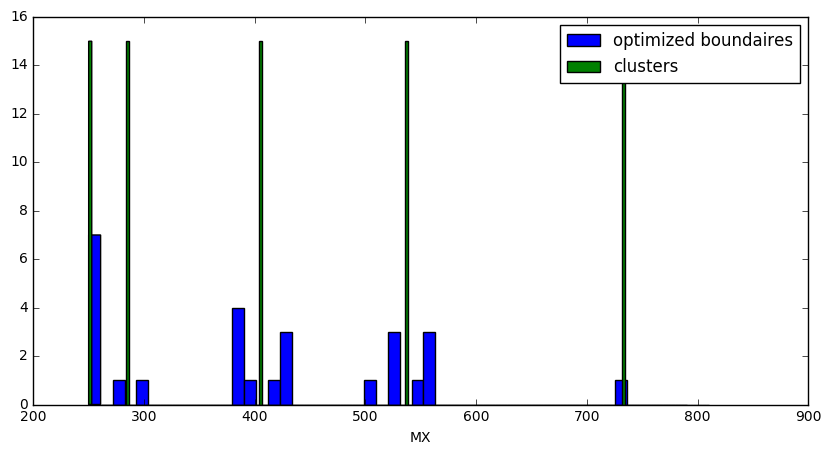

[ 250.          284.5695      404.76533333  537.605     ]


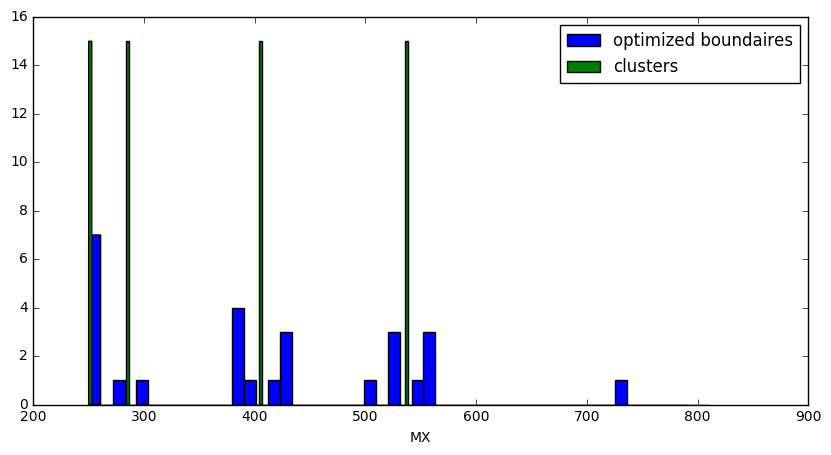

[ 250.          382.91154545  537.605     ]


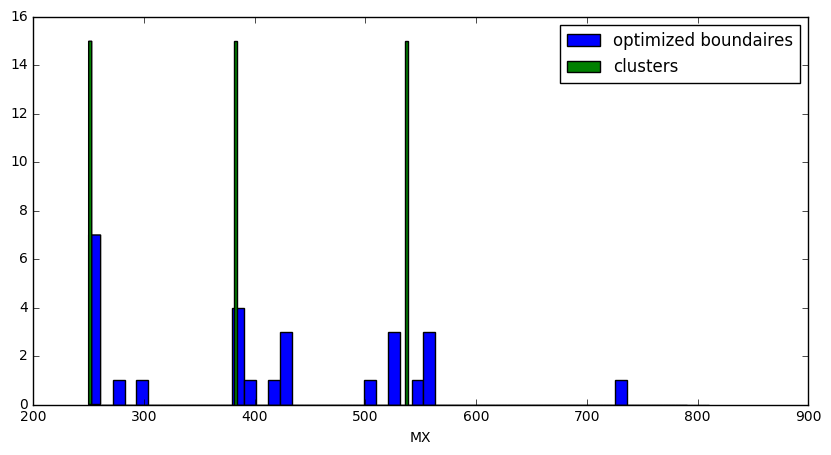

In [66]:
import matplotlib.pyplot as plt
for n_clusters in [4,3,2]:
    plt.clf()
    plt.figure(figsize=(10,5))
    plt.hist(boundaries,bins=50,range=[250,790],label="optimized boundaires");
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
#     kmeans.fit(filtered_2.reshape(-1,1))
#     centers = np.array(kmeans.cluster_centers_.ravel().tolist()+[250,800]) 
#     plt.hist(centers,bins=200,range=[250,800],weights=40.*np.ones_like(centers));

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters+1, n_init=10)
    kmeans.fit(filtered.reshape(-1,1))
    centers = np.array([250]+kmeans.cluster_centers_.ravel().tolist())
 #   centers = np.array(kmeans.cluster_centers_.ravel().tolist())

    centers.sort()
    centers=centers[:-1]
    plt.hist(centers,bins=200,range=[250,810],weights=15.*np.ones_like(centers),label="clusters");
    plt.xlabel("MX")
    print(centers)
    info_file = open(pathsave+"info_clustering_%s_%s_n_clusters%s.txt"%(tag,date,str(n_clusters)),"w") 
    info_file.write(",\n".join([str(i) for i in centers]))
    info_file.close()
    
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters+2, n_init=10)
#     kmeans.fit(boundaries.reshape(-1,1))
#     centers = kmeans.cluster_centers_.ravel() 
#     plt.hist(centers,bins=200,range=[250,800],weights=30.*np.ones_like(centers));
    plt.legend()
    plt.savefig(pathsave+"clustering_%s_%s_nclusters"%(tag,date)+"_"+str(n_clusters)+".pdf")
    plt.show()
